# Classical Model vs Ensemble Model

We evaluate the performance of classical model and ensemble modelbased on our extracted features with k fold cross validation

Classical Model

1. Decision Tree
2. Logistic Regression
3. Support Vector Machine
4. KNN
5. Naive Bayes

Ensembled Model

1. XGBoost
2. Random Forest



Import libraries

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (StratifiedKFold, cross_val_predict,
                                     cross_val_score)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBClassifier

Import data

In [2]:
data = pd.read_pickle("train_preprocess_final.pkl")

run this if you want to normalise data


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# only these two are known to not normalised
data['is_same_category'] = scaler.fit_transform(np.array(data['is_same_category']).reshape(-1, 1))
data['word_mover_similarity'] = scaler.fit_transform(np.array(data['word_mover_similarity']).reshape(-1, 1))

In [5]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_tokenised,question2_tokenised,question1_standardised,question2_standardised,...,question2_standardised_str,count_similarity,tfidf_similarity,word2vec_similarity,is_same_category,shared_word_percentage,word_mover_distance,question1_distilbert_vec,question2_distilbert_vec,quora_distilbert_similarity
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[What, is, the, step, by, step, guide, to, inv...","[What, is, the, step, by, step, guide, to, inv...","[step, step, guide, invest, share, market, ind...","[step, step, guide, invest, share, market, ]",...,step step guide invest share market,0.942809,0.979549,0.931028,1,0.857143,0.198042,"[0.13400432, 0.011401831, 0.384217, 0.10666315...","[0.12157856, 0.12911598, 0.4139563, 0.00960614...",0.974921
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[What, is, the, story, of, Kohinoor, (, Koh-i-...","[What, would, happen, if, the, Indian, governm...","[story, kohinoor, , kohinoor, , diamond, ]","[would, happen, indian, government, stole, koh...",...,would happen indian government stole kohinoor ...,0.615457,0.796109,0.487836,1,0.300000,1.146997,"[0.066412345, 0.22000474, 0.07003979, 0.219502...","[0.10082768, 0.08715289, -0.08183028, 0.423441...",0.932612
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[How, can, I, increase, the, speed, of, my, in...","[How, can, Internet, speed, be, increased, by,...","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns, ]",...,internet speed increased hacking dns,0.365148,0.277362,0.777991,1,0.300000,0.694896,"[-0.35967916, -0.14175767, 0.49237654, 0.45364...","[-0.059221882, -0.1102432, 0.24629357, 0.40093...",0.929791
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[Why, am, I, mentally, very, lonely, ?, How, c...","[Find, the, remainder, when, [, math, ], 23^, ...","[mentally, lonely, , solve, ]","[find, remainder, , math, , 23, , 24, , , math...",...,find remainder math 23 24 math divided 2...,0.000000,0.000000,0.345831,0,0.090909,1.261312,"[-0.13234596, 0.30402172, 0.23299657, 0.157642...","[0.0012889251, -0.03490505, 0.55573255, 0.4377...",0.714403
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[Which, one, dissolve, in, water, quikly, suga...","[Which, fish, would, survive, in, salt, water, ?]","[one, dissolve, water, quikly, sugar, , salt, ...","[fish, would, survive, salt, water, ]",...,fish would survive salt water,0.282843,0.230050,0.630007,1,0.214286,0.972994,"[-0.10022178, 0.10755836, 0.1372975, 0.4974853...","[0.2606254, 0.2029085, 0.06270384, 0.41680455,...",0.864697


## Running the Model

Setting up $X$ and $y$ for model prediction

In [4]:
scalar_features = [
  'is_equal',
  'question_len',
  'longest_common_substring',
  'gestalt_ratio',
  'levenshtein_ratio',
  'jaro_ratio',
  'jaro_winkler_ratio',
  'bigram_similarity',
  'trigram_similarity',
  'count_similarity',
  'tfidf_similarity',
  'word2vec_similarity',
  'is_same_category',
  'shared_word_percentage',
  'word_mover_distance',
  'quora_distilbert_similarity',
]
X = data[scalar_features]
y = data.is_duplicate
skf = StratifiedKFold()

Decision Tree

In [7]:
clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')
decision_tree_prediction = cross_val_predict(clf, X, y, cv=skf)

Random Forest

In [ ]:
clf = RandomForestClassifier(random_state=0, class_weight='balanced')
random_forest_prediction = cross_val_predict(clf, X, y, cv=skf)

Logistic Regression

In [9]:
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
logistic_regression_prediction = cross_val_predict(clf, X, y, cv=skf)

Support Vector Machine

In [10]:
clf = LinearSVC(class_weight='balanced')
linear_svc_prediction = cross_val_predict(clf, X, y, cv=skf)

KNN

First we need to determine the best k for knn

reference: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

In [8]:
mean_acc = []
for i in range(1, 21, 2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    mean_acc.append(cross_val_score(neigh, X, y, cv=skf).mean())

Maximum accuracy:- 0.7792358479799223 at K = 19


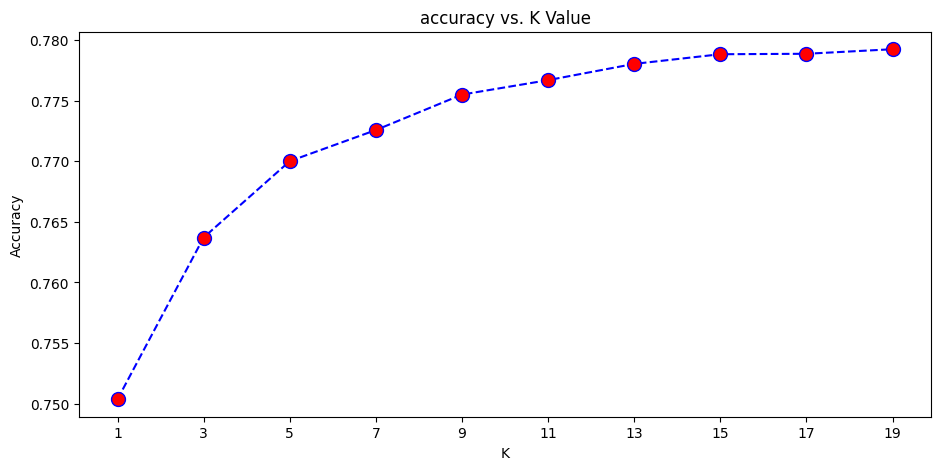

In [9]:
plt.figure(figsize=(11,5))
plt.plot(range(1,21,2),mean_acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xticks(np.arange(1, 21, 2))
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(mean_acc),"at K =",mean_acc.index(max(mean_acc))*2 + 1)

In [5]:
neigh = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_prediction = cross_val_predict(neigh, X, y, cv=skf)

Naive Bayes

In [12]:
gnb = GaussianNB()
naive_bayes_prediction = cross_val_predict(gnb, X, y, cv=skf)

XGBoost

In [13]:
xgb_classifier = XGBClassifier(random_state=0)
xgb_prediction = cross_val_predict(xgb_classifier, X, y, cv=skf)

Extracting the prediction result from each of the model

In [14]:
data['decision_tree_prediction'] = decision_tree_prediction.tolist()
data['random_forest_prediction'] = random_forest_prediction.tolist()
data['logistic_regression_prediction'] = logistic_regression_prediction.tolist()
data['linear_svc_prediction'] = linear_svc_prediction.tolist()
data['knn_prediction'] = knn_prediction.tolist()
data['naive_bayes_prediction'] = naive_bayes_prediction.tolist()
data['xgb_prediction'] = xgb_prediction.tolist()

## Model Evaluation

Create 2 new columns,

1. Majority outcome - Mode on all models
2. Majority outcome on simple models - Mode on simple models

The purpose of this is to analyze the performance difference between classical model and ensemble model 

In [15]:
model_pred_cols = [
    'decision_tree_prediction',
    'random_forest_prediction',
    'logistic_regression_prediction',
    'linear_svc_prediction',
    'knn_prediction',
    'naive_bayes_prediction',
    'xgb_prediction',
]

# ignores random forest and xgb
simple_classical_model_pred_cols = [
    'decision_tree_prediction',
    'logistic_regression_prediction',
    'linear_svc_prediction',
    'knn_prediction',
    'naive_bayes_prediction',
]

In [16]:
data['majority_outcome'] = data[model_pred_cols].mode(axis=1)
data['majority_outcome_simple'] = data[simple_classical_model_pred_cols].mode(axis=1)

Extract metrics of models

1. Accuracy
2. F1
3. ROC-AUC
4. Precision
5. Recall

In [17]:
accuracy_scores = list(map(lambda model: metrics.accuracy_score(data['is_duplicate'], data[model]), model_pred_cols))
f1_scores = list(map(lambda model: metrics.f1_score(data['is_duplicate'], data[model]), model_pred_cols))
roc_auc_scores = list(map(lambda model: metrics.roc_auc_score(data['is_duplicate'], data[model]), model_pred_cols))
precision_scores = list(map(lambda model: metrics.precision_score(data['is_duplicate'], data[model]), model_pred_cols))
recall_scores = list(map(lambda model: metrics.recall_score(data['is_duplicate'], data[model]), model_pred_cols))

Score for majority outcome on all models

In [18]:
accuracy_scores.append(metrics.accuracy_score(data['is_duplicate'], data['majority_outcome'])) 
f1_scores.append(metrics.f1_score(data['is_duplicate'], data['majority_outcome'])) 
roc_auc_scores.append(metrics.roc_auc_score(data['is_duplicate'], data['majority_outcome'])) 
precision_scores.append(metrics.precision_score(data['is_duplicate'], data['majority_outcome'])) 
recall_scores.append(metrics.recall_score(data['is_duplicate'], data['majority_outcome'])) 

Score for majority outcome on simple models

In [19]:
accuracy_scores.append(metrics.accuracy_score(data['is_duplicate'], data['majority_outcome_simple'])) 
f1_scores.append(metrics.f1_score(data['is_duplicate'], data['majority_outcome_simple'])) 
roc_auc_scores.append(metrics.roc_auc_score(data['is_duplicate'], data['majority_outcome_simple'])) 
precision_scores.append(metrics.precision_score(data['is_duplicate'], data['majority_outcome_simple'])) 
recall_scores.append(metrics.recall_score(data['is_duplicate'], data['majority_outcome_simple'])) 

Score by fitting outcomes into logistic model

In [ ]:
X = data[simple_classical_model_pred_cols]
y = data.is_duplicate
skf = StratifiedKFold()
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
logistic_regression_ensemble_prediction = cross_val_predict(clf, X, y, cv=skf)

In [ ]:
data['logistic_regression_ensemble_prediction'] = logistic_regression_ensemble_prediction.tolist()
accuracy_scores.append(metrics.accuracy_score(data['is_duplicate'], data['logistic_regression_ensemble_prediction'])) 
f1_scores.append(metrics.f1_score(data['is_duplicate'], data['logistic_regression_ensemble_prediction'])) 
roc_auc_scores.append(metrics.roc_auc_score(data['is_duplicate'], data['logistic_regression_ensemble_prediction'])) 
precision_scores.append(metrics.precision_score(data['is_duplicate'], data['logistic_regression_ensemble_prediction'])) 
recall_scores.append(metrics.recall_score(data['is_duplicate'], data['logistic_regression_ensemble_prediction'])) 

In [ ]:
result = pd.DataFrame(data={
    'accuracy': accuracy_scores,
    'f1': f1_scores,
    'roc_auc': roc_auc_scores,
    'precision': precision_scores,
    'recall': recall_scores
}, index = [
    'decision_tree',
    'random_forest',
    'logistic_regression',
    'linear_svc',
    'knn',
    'naive_bayes',
    'xgb',
    'mode',
    'mode_simple',
    'logistic_regression_ensemble',
])

In [21]:
result

,accuracy,f1,roc_auc,precision,recall
decision_tree,0.767489,0.683991,0.749648,0.686595,0.681406
random_forest,0.833532,0.776019,0.822627,0.771187,0.780911
logistic_regression,0.790557,0.755519,0.808338,0.663971,0.876349
linear_svc,0.786057,0.753667,0.806827,0.655579,0.886272
knn,0.782447,0.718767,0.776309,0.687651,0.752832
naive_bayes,0.709916,0.648948,0.713262,0.586642,0.726060
xgb,0.828983,0.773192,0.820773,0.757662,0.789373
mode,0.821649,0.778072,0.826826,0.719786,0.846629
mode_simple,0.794753,0.756323,0.808803,0.673397,0.862541


# Neural Network

For neural network, instead of creating a new RNN/Transformer model, we choose to just use BERT model for sentence embedding.

There are mainly 3 ways to use Bert model for this tasks

Define $F(x) = v$, where $F$ is bert sentence embedding model, $x$ is the input sentence and $v$ is the output vector

Define $NN(v) = \hat{y}$ where NN is a neural network model that takes in a vector $v$ and output a prediction $\hat{y}$

Let sentence 1 be $s_1$, sentence 2 be $s_2$

1. $NN(F(s_1) - F(s_2))$

Justification: If 2 sentence are similar, then they should have similar sentence embedding. Taking the difference between these 2 vectors should provide a meaningful intermediate result

2. $NN(F(s_1) || F(s_2))$

Justification: Concatenating 2 vector embeddings should provide more information than taking the difference between the 2 vectors. This will result in a higher variance but lower bias

3. $NN(F(s_1 || separator || s_2)$

Justification: Concatenate the 2 sentences before passing to bert sentence embedding is hoping that the bert sentence embedding are able to produce certain vector that means the document contains 2 sentences that have the same meaning.

   

## Model 1

Initialize the model

In [3]:
dimension = 768

def initializeModel():
    model = keras.Sequential(
        [
            layers.Dense(dimension, activation=tf.nn.relu),
            layers.Dropout(0.1),
            layers.Dense(512, activation=tf.nn.relu),
            layers.Dropout(0.1),
            layers.Dense(64, activation=tf.nn.relu),
            layers.Dense(16, activation=tf.nn.relu),
            layers.Dense(8, activation=tf.nn.relu),
            layers.Dense(1, activation=tf.nn.sigmoid, name="output")
        ]
    )

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC(), tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()],
    )
    return model

Preparing the data

In [4]:
def getInput(x):
    return (x.question1_distilbert_vec - x.question2_distilbert_vec).tolist()

train_data = data.sample(frac=0.75)
test_data = data.drop(train_data.index)

x_train, y_train = tf.convert_to_tensor(train_data.apply(lambda x : getInput(x), axis = 1).to_list()), tf.convert_to_tensor(train_data["is_duplicate"])
x_test, y_test = tf.convert_to_tensor(test_data.apply(lambda x : getInput(x), axis = 1).to_list()), tf.convert_to_tensor(test_data["is_duplicate"])

Evaluate the model

In [5]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=3)
model = initializeModel()

model.fit(x_train, y_train, epochs=150, batch_size=1024, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/150
297/297 [==============================] - 9s 29ms/step - loss: 0.4262 - binary_accuracy: 0.7805 - auc: 0.8743 - false_negatives: 43779.0000 - false_positives: 22768.0000 - val_loss: 0.3761 - val_binary_accuracy: 0.8226 - val_auc: 0.9040 - val_false_negatives: 9282.0000 - val_false_positives: 8648.0000
Epoch 2/150
297/297 [==============================] - 8s 27ms/step - loss: 0.3606 - binary_accuracy: 0.8327 - auc: 0.9112 - false_negatives: 23095.0000 - false_positives: 27632.0000 - val_loss: 0.3603 - val_binary_accuracy: 0.8316 - val_auc: 0.9121 - val_false_negatives: 8469.0000 - val_false_positives: 8552.0000
Epoch 3/150
297/297 [==============================] - 8s 27ms/step - loss: 0.3381 - binary_accuracy: 0.8446 - auc: 0.9228 - false_negatives: 22341.0000 - false_positives: 24782.0000 - val_loss: 0.3507 - val_binary_accuracy: 0.8395 - val_auc: 0.9176 - val_false_negatives: 8513.0000 - val_false_positives: 7700.0000
Epoch 4/150
297/297 [==============================]

In [7]:
res = model.evaluate(x_train, y_train)
print('Train Accuracy: %.2f' % (res[1]*100))
res = model.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (res[1]*100))

9474/9474 [==============================] - 18s 2ms/step - loss: 0.2199 - binary_accuracy: 0.9102 - auc: 0.9707 - false_negatives: 14715.0000 - false_positives: 12507.0000
Train Accuracy: 91.02
3158/3158 [==============================] - 6s 2ms/step - loss: 0.3522 - binary_accuracy: 0.8443 - auc: 0.9211 - false_negatives: 8221.0000 - false_positives: 7514.0000
Test Accuracy: 84.43


## Model 2

Model Initialization

In [11]:
dimension = 768 * 2

def initializeModel():
    model = keras.Sequential(
        [
            layers.Dense(dimension, activation=tf.nn.relu),
            layers.Dropout(0.1),
            layers.Dense(512, activation=tf.nn.relu),
            layers.Dropout(0.1),
            layers.Dense(64, activation=tf.nn.relu),
            layers.Dense(16, activation=tf.nn.relu),
            layers.Dense(8, activation=tf.nn.relu),
            layers.Dense(1, activation=tf.nn.sigmoid, name="output")
        ]
    )

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC(), tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()],
    )
    return model

Preparing the data

In [12]:
def getInput(x):
    return (np.concatenate([x.question1_distilbert_vec, x.question2_distilbert_vec])).tolist()

train_data = data.sample(frac=0.75)
test_data = data.drop(train_data.index)

x_train, y_train = tf.convert_to_tensor(train_data.apply(lambda x : getInput(x), axis = 1).to_list()), tf.convert_to_tensor(train_data["is_duplicate"])
x_test, y_test = tf.convert_to_tensor(test_data.apply(lambda x : getInput(x), axis = 1).to_list()), tf.convert_to_tensor(test_data["is_duplicate"])

Evaluate the Model

In [13]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=3)
model = initializeModel()

model.fit(x_train, y_train, epochs=150, batch_size=1024, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/150
297/297 [==============================] - 5s 13ms/step - loss: 0.5272 - binary_accuracy: 0.7326 - auc_1: 0.7917 - false_negatives_1: 55277.0000 - false_positives_1: 25791.0000 - val_loss: 0.4058 - val_binary_accuracy: 0.8079 - val_auc_1: 0.8868 - val_false_negatives_1: 10156.0000 - val_false_positives_1: 9257.0000
Epoch 2/150
297/297 [==============================] - 3s 11ms/step - loss: 0.3955 - binary_accuracy: 0.8129 - auc_1: 0.8919 - false_negatives_1: 27029.0000 - false_positives_1: 29690.0000 - val_loss: 0.3870 - val_binary_accuracy: 0.8179 - val_auc_1: 0.9033 - val_false_negatives_1: 5718.0000 - val_false_positives_1: 12680.0000
Epoch 3/150
297/297 [==============================] - 3s 11ms/step - loss: 0.3718 - binary_accuracy: 0.8269 - auc_1: 0.9055 - false_negatives_1: 24968.0000 - false_positives_1: 27512.0000 - val_loss: 0.3645 - val_binary_accuracy: 0.8310 - val_auc_1: 0.9096 - val_false_negatives_1: 8368.0000 - val_false_positives_1: 8712.0000
Epoch 4/150
29

In [15]:
res = model.evaluate(x_train, y_train)
print('Train Accuracy: %.2f' % (res[1]*100))
res = model.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (res[1]*100))

9474/9474 [==============================] - 38s 4ms/step - loss: 0.3068 - binary_accuracy: 0.8616 - auc_1: 0.9433 - false_negatives_1: 10491.0000 - false_positives_1: 31464.0000
Train Accuracy: 86.16
3158/3158 [==============================] - 13s 4ms/step - loss: 0.3479 - binary_accuracy: 0.8397 - auc_1: 0.9236 - false_negatives_1: 4672.0000 - false_positives_1: 11527.0000
Test Accuracy: 83.97


## Model 3

Model Initialization

In [16]:
dimension = 768

def initializeModel():
    tf.keras.backend.clear_session()
    model = keras.Sequential(
        [
            layers.Dense(dimension, activation=tf.nn.relu),
            layers.Dropout(0.1),
            layers.Dense(512, activation=tf.nn.relu),
            layers.Dropout(0.1),
            layers.Dense(64, activation=tf.nn.relu),
            layers.Dense(16, activation=tf.nn.relu),
            layers.Dense(8, activation=tf.nn.relu),
            layers.Dense(1, activation=tf.nn.sigmoid, name="output")
        ]
    )

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC(), tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()],
    )
    return model

Preparing the data

In [17]:
def getInput(x):
    return x.question1_2_distilbert_vec.tolist()

train_data = data.sample(frac=0.75)
test_data = data.drop(train_data.index)

x_train, y_train = tf.convert_to_tensor(train_data.apply(lambda x : getInput(x), axis = 1).to_list()), tf.convert_to_tensor(train_data["is_duplicate"])
x_test, y_test = tf.convert_to_tensor(test_data.apply(lambda x : getInput(x), axis = 1).to_list()), tf.convert_to_tensor(test_data["is_duplicate"])

Evaluate the Model

In [18]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=3)
model = initializeModel()

model.fit(x_train, y_train, epochs=150, batch_size=1024, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/150
297/297 [==============================] - 4s 11ms/step - loss: 0.5089 - binary_accuracy: 0.7396 - auc: 0.8065 - false_negatives: 45132.0000 - false_positives: 33793.0000 - val_loss: 0.5676 - val_binary_accuracy: 0.7152 - val_auc: 0.8403 - val_false_negatives: 26289.0000 - val_false_positives: 2493.0000
Epoch 2/150
297/297 [==============================] - 3s 10ms/step - loss: 0.4569 - binary_accuracy: 0.7712 - auc: 0.8496 - false_negatives: 37466.0000 - false_positives: 31880.0000 - val_loss: 0.4575 - val_binary_accuracy: 0.7667 - val_auc: 0.8583 - val_false_negatives: 7658.0000 - val_false_positives: 15914.0000
Epoch 3/150
297/297 [==============================] - 3s 10ms/step - loss: 0.4394 - binary_accuracy: 0.7818 - auc: 0.8622 - false_negatives: 35240.0000 - false_positives: 30899.0000 - val_loss: 0.4325 - val_binary_accuracy: 0.7848 - val_auc: 0.8680 - val_false_negatives: 9942.0000 - val_false_positives: 11799.0000
Epoch 4/150
297/297 [============================

In [19]:
res = model.evaluate(x_train, y_train)
print('Train Accuracy: %.2f' % (res[1]*100))
res = model.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (res[1]*100))

9474/9474 [==============================] - 51s 5ms/step - loss: 0.3041 - binary_accuracy: 0.8660 - auc: 0.9415 - false_negatives: 17525.0000 - false_positives: 23084.0000
Train Accuracy: 86.60
3158/3158 [==============================] - 15s 5ms/step - loss: 0.3950 - binary_accuracy: 0.8115 - auc: 0.8952 - false_negatives: 8498.0000 - false_positives: 10551.0000
Test Accuracy: 81.15


Looking at the accuracy, it seems that Model 1 has performs better compared to Model 2 and Model 3.

# Ensemble Classical Model and Neural Network

Now let's try to ensemble the neural network with the extracted features

We are using model 1 here since it has the best performance

In [9]:
data["bert_nn"] = model.predict(tf.convert_to_tensor(data.apply(lambda x : getInput(x), axis = 1).to_list()))

12631/12631 [==============================] - 21s 2ms/step


Plotting out the distribution of the neural network's output

Text(0.5, 0, 'Bert neural network')

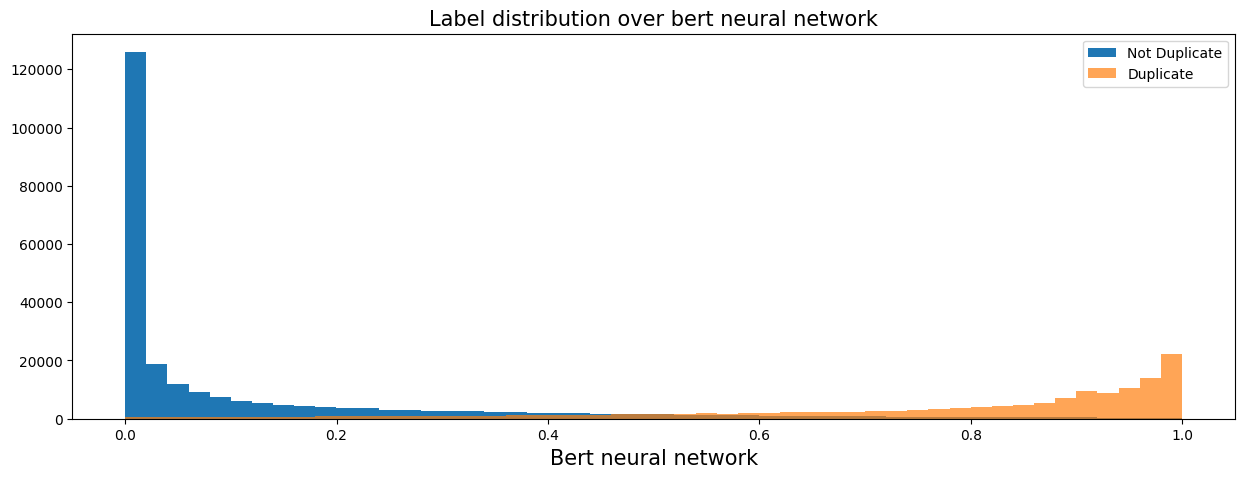

In [10]:
plt.figure(figsize=(15, 5))
train_word_match = data["bert_nn"]

plt.hist(train_word_match[data['is_duplicate'] == 0], bins=50, label='Not Duplicate')
plt.hist(train_word_match[data['is_duplicate'] == 1], bins=50, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over bert neural network', fontsize=15)
plt.xlabel('Bert neural network', fontsize=15)

There seems to be a clear separation around 0.5 for the 2 labels. 

This shows that the bert_nn can be a good feature for the classical model

Repeating the ensemble code for classical model

In [10]:
scalar_features = [
  'is_equal',
  'question_len',
  'longest_common_substring',
  'gestalt_ratio',
  'levenshtein_ratio',
  'jaro_ratio',
  'jaro_winkler_ratio',
  'bigram_similarity',
  'trigram_similarity',
  'count_similarity',
  'tfidf_similarity',
  'word2vec_similarity',
  'is_same_category',
  'shared_word_percentage',
  'word_mover_distance',
  'quora_distilbert_similarity',
  'bert_nn',
]
X = data[scalar_features]
y = data.is_duplicate
skf = StratifiedKFold()

Decision Tree

In [11]:
clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')
decision_tree_prediction = cross_val_predict(clf, X, y, cv=skf)

Random Forest

In [12]:
clf = RandomForestClassifier(random_state=0, class_weight='balanced')
random_forest_prediction = cross_val_predict(clf, X, y, cv=skf)

Logistic Regression

In [13]:
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
logistic_regression_prediction = cross_val_predict(clf, X, y, cv=skf)

Support Vector Machine

In [14]:
clf = LinearSVC(class_weight='balanced')
linear_svc_prediction = cross_val_predict(clf, X, y, cv=skf)

KNN

In [15]:
neigh = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_prediction = cross_val_predict(neigh, X, y, cv=skf)

Naive Bayes

In [16]:
gnb = GaussianNB()
naive_bayes_prediction = cross_val_predict(gnb, X, y, cv=skf)

XGBoost

In [17]:
xgb_classifier = XGBClassifier(random_state=0)
xgb_prediction = cross_val_predict(xgb_classifier, X, y, cv=skf)

Extracting the prediction result from each of the model

In [18]:
data['decision_tree_prediction'] = decision_tree_prediction.tolist()
data['random_forest_prediction'] = random_forest_prediction.tolist()
data['logistic_regression_prediction'] = logistic_regression_prediction.tolist()
data['linear_svc_prediction'] = linear_svc_prediction.tolist()
data['knn_prediction'] = knn_prediction.tolist()
data['naive_bayes_prediction'] = naive_bayes_prediction.tolist()
data['xgb_prediction'] = xgb_prediction.tolist()

## Model Evaluation

Create 2 new columns,

1. Majority outcome - Mode on all models
2. Majority outcome on simple models - Mode on simple models

The purpose of this is to analyze the performance difference between classical model and ensemble model 

In [19]:
model_pred_cols = [
    'decision_tree_prediction',
    'random_forest_prediction',
    'logistic_regression_prediction',
    'linear_svc_prediction',
    'knn_prediction',
    'naive_bayes_prediction',
    'xgb_prediction',
]

# ignores random forest and xgb
simple_classical_model_pred_cols = [
    'decision_tree_prediction',
    'logistic_regression_prediction',
    'linear_svc_prediction',
    'knn_prediction',
    'naive_bayes_prediction',
]

In [20]:
data['majority_outcome'] = data[model_pred_cols].mode(axis=1)
data['majority_outcome_simple'] = data[simple_classical_model_pred_cols].mode(axis=1)

Extract metrics of models

1. Accuracy
2. F1
3. ROC-AUC
4. Precision
5. Recall

In [21]:
accuracy_scores = list(map(lambda model: metrics.accuracy_score(data['is_duplicate'], data[model]), model_pred_cols))
f1_scores = list(map(lambda model: metrics.f1_score(data['is_duplicate'], data[model]), model_pred_cols))
roc_auc_scores = list(map(lambda model: metrics.roc_auc_score(data['is_duplicate'], data[model]), model_pred_cols))
precision_scores = list(map(lambda model: metrics.precision_score(data['is_duplicate'], data[model]), model_pred_cols))
recall_scores = list(map(lambda model: metrics.recall_score(data['is_duplicate'], data[model]), model_pred_cols))

Score for majority outcome on all models

In [22]:
accuracy_scores.append(metrics.accuracy_score(data['is_duplicate'], data['majority_outcome'])) 
f1_scores.append(metrics.f1_score(data['is_duplicate'], data['majority_outcome'])) 
roc_auc_scores.append(metrics.roc_auc_score(data['is_duplicate'], data['majority_outcome'])) 
precision_scores.append(metrics.precision_score(data['is_duplicate'], data['majority_outcome'])) 
recall_scores.append(metrics.recall_score(data['is_duplicate'], data['majority_outcome'])) 

Score for majority outcome on simple models

In [23]:
accuracy_scores.append(metrics.accuracy_score(data['is_duplicate'], data['majority_outcome_simple'])) 
f1_scores.append(metrics.f1_score(data['is_duplicate'], data['majority_outcome_simple'])) 
roc_auc_scores.append(metrics.roc_auc_score(data['is_duplicate'], data['majority_outcome_simple'])) 
precision_scores.append(metrics.precision_score(data['is_duplicate'], data['majority_outcome_simple'])) 
recall_scores.append(metrics.recall_score(data['is_duplicate'], data['majority_outcome_simple'])) 

Score by fitting outcomes into logistic model

In [ ]:
X = data[simple_classical_model_pred_cols]
y = data.is_duplicate
skf = StratifiedKFold()
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
logistic_regression_ensemble_prediction = cross_val_predict(clf, X, y, cv=skf)

In [ ]:
data['logistic_regression_ensemble_prediction'] = logistic_regression_ensemble_prediction.tolist()
accuracy_scores.append(metrics.accuracy_score(data['is_duplicate'], data['logistic_regression_ensemble_prediction'])) 
f1_scores.append(metrics.f1_score(data['is_duplicate'], data['logistic_regression_ensemble_prediction'])) 
roc_auc_scores.append(metrics.roc_auc_score(data['is_duplicate'], data['logistic_regression_ensemble_prediction'])) 
precision_scores.append(metrics.precision_score(data['is_duplicate'], data['logistic_regression_ensemble_prediction'])) 
recall_scores.append(metrics.recall_score(data['is_duplicate'], data['logistic_regression_ensemble_prediction'])) 

In [ ]:
result = pd.DataFrame(data={
    'accuracy': accuracy_scores,
    'f1': f1_scores,
    'roc_auc': roc_auc_scores,
    'precision': precision_scores,
    'recall': recall_scores
}, index = [
    'decision_tree',
    'random_forest',
    'logistic_regression',
    'linear_svc',
    'knn',
    'naive_bayes',
    'xgb',
    'mode',
    'mode_simple',
    'logistic_regression_ensemble',
])

In [25]:
result

,accuracy,f1,roc_auc,precision,recall
decision_tree,0.866500,0.818090,0.855392,0.823345,0.812902
random_forest,0.917204,0.890845,0.916729,0.868011,0.914913
logistic_regression,0.911526,0.886506,0.916535,0.842229,0.935696
linear_svc,0.910712,0.886022,0.916737,0.838079,0.939783
knn,0.914186,0.887339,0.914384,0.861177,0.915141
naive_bayes,0.835346,0.791228,0.837329,0.743956,0.844914
xgb,0.917657,0.891809,0.917937,0.866175,0.919007
mode,0.916069,0.891017,0.918770,0.855930,0.929103
mode_simple,0.913075,0.888132,0.917492,0.846238,0.934389
